In [313]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
import sympy as sp

In [314]:
df = pd.read_csv('D:/DS_Projects/DCT_Atharva.csv')

In [315]:
df.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [316]:
df.info

<bound method DataFrame.info of      Outlook Temperature Humidity    Wind PlayTennis
0      Sunny         Hot     High    Weak         No
1      Sunny         Hot     High  Strong         No
2   Overcast         Hot     High    Weak        Yes
3       Rain        Mild     High    Weak        Yes
4       Rain        Cool   Normal    Weak        Yes
5       Rain        Cool   Normal  Strong         No
6   Overcast        Cool   Normal  Strong        Yes
7      Sunny        Mild     High    Weak         No
8      Sunny        Cool   Normal    Weak        Yes
9       Rain        Mild   Normal    Weak        Yes
10     Sunny        Mild   Normal  Strong        Yes
11  Overcast        Mild     High  Strong        Yes
12  Overcast         Hot   Normal    Weak        Yes
13      Rain        Mild     High  Strong         No>

In [317]:
print ("Dataset Length: ", len(df))

Dataset Length:  14


In [318]:
df['Outlook'].unique()

array(['Sunny', 'Overcast', 'Rain'], dtype=object)

In [319]:
df['Temperature'].unique()

array(['Hot', 'Mild', 'Cool'], dtype=object)

In [320]:
df['Humidity'].unique()

array(['High', 'Normal'], dtype=object)

In [321]:
df['Wind'].unique()

array(['Weak', 'Strong'], dtype=object)

In [322]:
df['PlayTennis'].unique()

array(['No', 'Yes'], dtype=object)

In [323]:
# We do not have any missing value as of now

In [324]:
# Now we are having all the categorical values and to train any model we require a numeric entry. So we are doing one hot
# Encoding on he given set of data which will convert allcategorical values in numerical in form of 1's and 0's.

In [325]:
tree = DecisionTreeClassifier()

In [326]:
target = df['PlayTennis']

In [327]:
df = pd.get_dummies(df, columns = ['Outlook', 'Temperature','Humidity','Wind'])
df = df.drop('PlayTennis', axis =1)
df

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1
5,0,1,0,1,0,0,0,1,1,0
6,1,0,0,1,0,0,0,1,1,0
7,0,0,1,0,0,1,1,0,0,1
8,0,0,1,1,0,0,0,1,0,1
9,0,1,0,0,0,1,0,1,0,1


In [328]:
# Now we can use the sci-kit learn to train a  decision tree

In [329]:
X= df

In [330]:
#label encoding
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [331]:
y = target

In [332]:
y_train

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (11, 10)
Testing split input-  (3, 10)


In [334]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [335]:
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



Text(0.5, 1.0, 'Accuracy Score: 1.0')

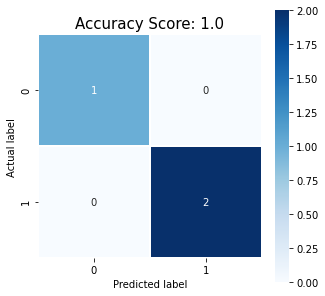

In [336]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

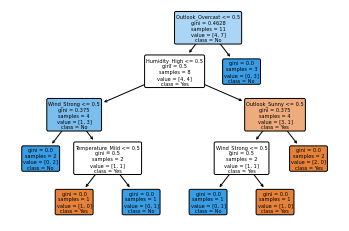

In [337]:
dec_tree = plot_tree(decision_tree=dtree, feature_names = df.columns, 
                     class_names =["Yes", "No"] , filled = True , precision = 4, rounded = True)

In [338]:
# Manual IF-ELSE Ladder in Decision tree (Logic Clearence)

In [339]:
# I am reffering to the manual calculations for plotting the if else ladder in Decision tree

In [340]:
# Now to calculate the root node we need to select the function with maximum gain

In [341]:
# If we look at our dataset we have few attributes to choose from like outlook,temprature,Humidity,wind

In [344]:
outlook = sp.symbols('outlook')
Temperature= sp.symbols('Temperature')
Humidity = sp.symbols('Humidity')
Wind = sp.symbols('Wind')

In [348]:
root_node = 0
outlook = 0.2464
Temprature = 0.0289
Humidity = 0.1516
Wind = 0.0478

In [349]:
# general criteria for root node be that Information gain > 0.2 so

In [350]:
if(outlook>0.2):
    root_node = outlook
    print(" Root Node: Outlook ")
elif(Temperature>0.2):
    root_node = Temperature
    print(" Root Node: Temperature ")
elif(Humidity>0.2):
    root_node = Humidity
    print(" Root Node: Humidity ")
else:
    root_node = Wind
    print(" Root Node: Wind ")
    

 Root Node: Outlook 


In [351]:
# Now we have 3 values for outlook -----> Sunny, Overcast, Rain

In [352]:
# Now for sunny we will consider only those rows that consists outlook= sunny

In [353]:
# Sunny

In [356]:
Temp_s = 0.570
Humid_s = 0.97
wind_s = 0.0192

In [357]:
if(Temp_s>0.9):
    pred_sunny_node = Temp_s
    print(" pred_sunny_node: Temp_s ")
elif(Humid_h>0.9):
    pred_sunny_node = Humid_s
    print(" pred_sunny_node: Humid_s ")
elif(wind_s>0.9):
    pred_sunny_node = wind_s
    print(" pred_sunny_node: wind_s ")

 pred_sunny_node: Humid_s 


In [358]:
# Now we can have 2 options for Humidity High and Normal

In [360]:
# and high has complete no values meaning that if humidity is high there is no chance of playing Tennis
# and Normal has complete yes values meaning that if humidity is Normal there is 100% chance of playing Tennis
# Complete Homegenity is attained on the left side of the tree

In [361]:
# If we consider Overcast then we already have the homogenity attained so no further nodes

In [362]:
# If we consider Rain the last parameter of outlook then

In [363]:
Temp_w = 0.0192
Humid_w = 0.0192
wind_w = 0.97

In [364]:
if(Temp_w>0.9):
    pred_wind_node = Temp_w
    print(" pred_wind_node: Temp_w ")
elif(Humid_w>0.9):
    pred_wind_node = Humid_w
    print(" pred_wind_node: Humid_w ")
elif(wind_w>0.9):
    pred_wind_node = wind_w
    print(" pred_wind_node: wind_w ")

 pred_wind_node: wind_w 


In [365]:
# Now we are having 2 options in Wind that is strong and weak so if we select strong there is 100% chance of not playing tennis

In [366]:
# If we select Weak 100% chance of playing tennis so complete homogenity is attended. 